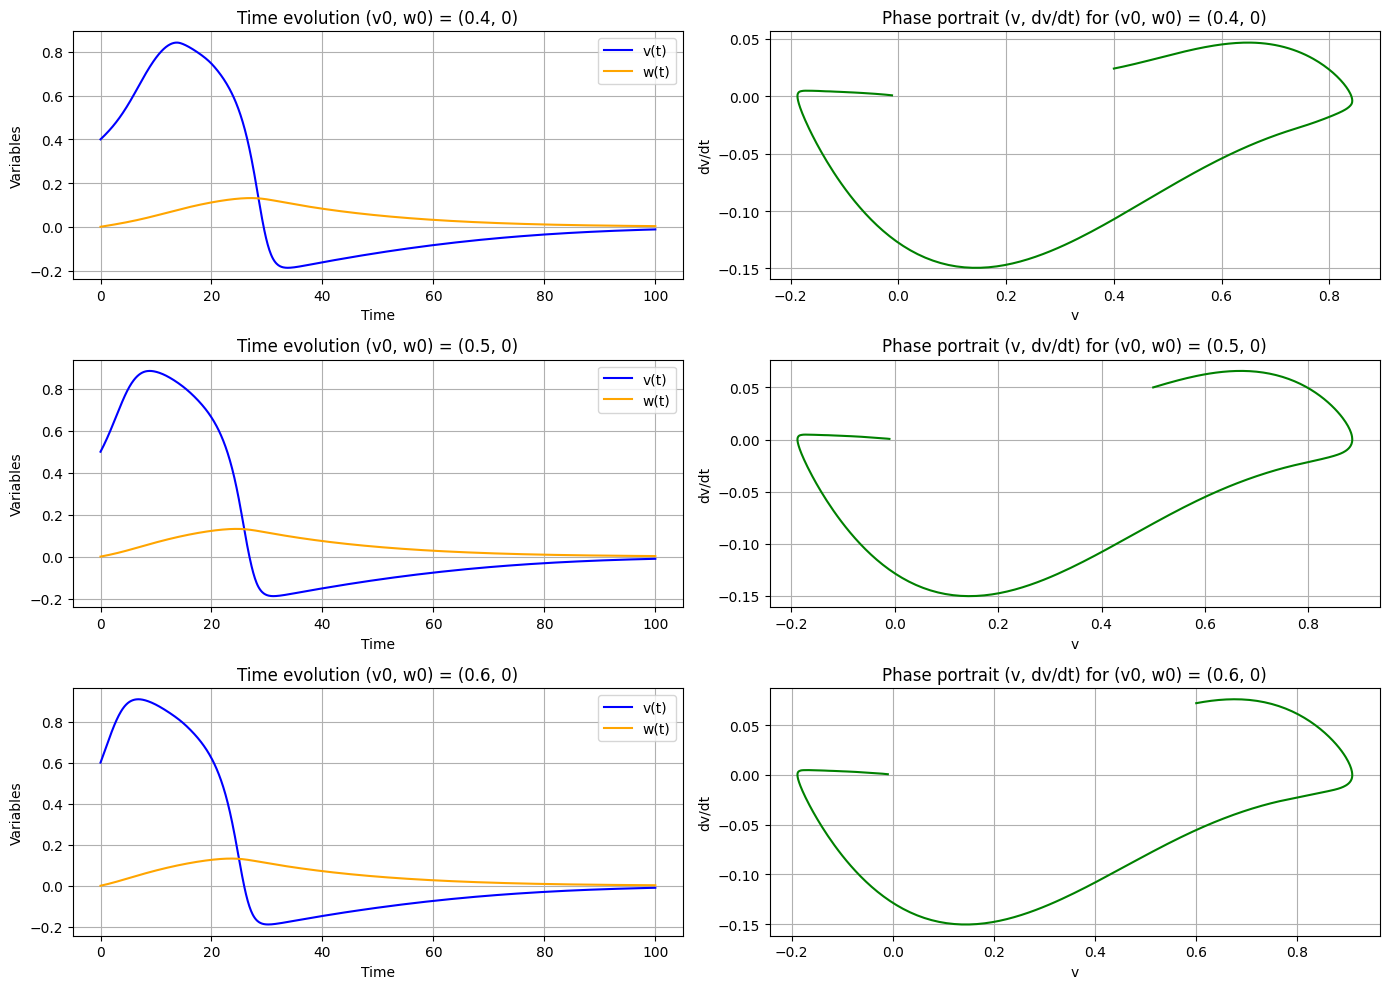

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

a = 0.3
epsilon = 0.01
gamma = 2.5
I = 0

def fitzhugh_nagumo(t, y):
    v, w = y
    dv_dt = -v * (v - a) * (v - 1) - w + I
    dw_dt = epsilon * (v - gamma * w)
    return [dv_dt, dw_dt]

t_span = (0, 100)  
t_eval = np.linspace(*t_span, 1000)  
initial_conditions = [(0.4, 0), (0.5, 0), (0.6, 0)] 

solutions = []
for v0, w0 in initial_conditions:
    sol = solve_ivp(fitzhugh_nagumo, t_span, [v0, w0], t_eval=t_eval, method='RK45')
    solutions.append(sol)

plt.figure(figsize=(14, 10))

for i, sol in enumerate(solutions):
    plt.subplot(3, 2, 2 * i + 1)
    plt.plot(sol.t, sol.y[0], label="v(t)", color='blue')
    plt.plot(sol.t, sol.y[1], label="w(t)", color='orange')
    plt.title(f"Time evolution (v0, w0) = {initial_conditions[i]}")
    plt.xlabel("Time")
    plt.ylabel("Variables")
    plt.legend()
    plt.grid()

for i, sol in enumerate(solutions):
    v = sol.y[0]
    w = sol.y[1]
    dv_dt = -v * (v - a) * (v - 1) - w + I  # Считаем dv/dt для фазового портрета
    plt.subplot(3, 2, 2 * i + 2)
    plt.plot(v, dv_dt, color='green')
    plt.title(f"Phase portrait (v, dv/dt) for (v0, w0) = {initial_conditions[i]}")
    plt.xlabel("v")
    plt.ylabel("dv/dt")
    plt.grid()

plt.tight_layout()
plt.show()